# Automação de Processos com Selenium

## Funcionalidades do ChromeDriver

O Webdriver tem por objetivo simular de forma automática todos os passos que o ser humano faria no navegador a fim de realizar determinada tarefa. Podemos localizar os elementos presentes no HTML de um site por meio de seus atributos (XPath, nome da classe, ID, CSS Selector etc.) e interagir com eles. Essas interações incluem: 

> Interações diretas, como clicar com o método `.click()`, enviar teclas com o método `send_keys()`

> Extrair o código HTML que constrói aquele objeto na página web, com destaque para a extração de tabelas com o get_attribute("outerHTML") e a função `pd.read_html` 

Ao fazer a busca por um elemento na página web, o Selenium retorna um objeto do tipo "WebElement". Ele funciona de forma semelhante a uma lista do Python, contendo cada elemento encontrado que possui o atributo pesquisado, um em cada posição. Podemos acessar o elemento que desejamos pelo índice da lista (Ex: html[0]), para realizar as operações em cima dele. 

## Processos comuns para utilização do Webdriver: 

#### Importar Bibliotecas

 > **from** selenium **import** webdriver 
 >
 > **from** selenium.webdriver.common.keys **import** Keys # permite especificar qual tecla pressionar (Ex: Keys.RETURN)
  
#### Abrir o ChromeDriver

Antes de tudo, devemos instalar o `chromedriver.exe` e requerir o seu PATH (dada sua versão do Google Chrome), para abrir o aplicativo de teste automatizado.

    driver = webdriver.Chrome("chromedriver.exe")
   
#### Abrir o navegador automatizado

    driver.get("link")
    
#### Incluir pausas

Importante para pausar a execução do código por determinado período, e aguardar o navegador carregar a ação feita anteriormente. Incluímos pausas com o módulo `time`

 > **from** time **import** sleep
 
    sleep(segundos)

#### Fechar o navegador automatizado

    driver.quit()

# Exemplos Práticos

### Importação dos títulos das notícias da Reuters

In [18]:
from selenium import webdriver

In [25]:
driver = webdriver.Chrome("./chromedriver.exe")

driver.get("https://www.reuters.com/places/brazil")

titulos = driver.find_elements_by_class_name("story-title")

for i in titulos: 
    print(i.text)

driver.quit()

Brazil's federal police open probe into Bolsonaro over vaccine deal - source
At a Rio cafe, cats and coffee combine for a cause
Brazil registers 745 COVID-19 deaths on Monday
Majority of Brazilians support impeaching Bolsonaro, poll shows
Brazil 2022 election will take place; 'It's that simple,' says Senate president
Brazil COVID-19 case count tops 19 million, death toll 531,688 -Health Ministry
Brazilian TV presenter declares himself presidential hopeful on air
Picky "vaccine sommeliers" undermine Brazil inoculation campaign, experts say
Eyeing presidency, gay Brazilian governor braces for anti-LGBT+ jibes
Deforestation in Brazil's Amazon rainforest rises for fourth straight month
Former U.S. drug agency informant arrested in Haiti assassination, DEA source says
Japan warns of crisis over Taiwan, growing risks from U.S.-China rivalry
Cuba arrests activists as government blames unrest on U.S. interference
Living with COVID-19: Israel changes strategy as Delta variant hits
Polish ruling

### Importação de dados da B3

In [ ]:
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
driver = webdriver.Chrome("./chromedriver.exe")

driver.get("http://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-taxas-referenciais-bmf-ptBR.asp")

html = driver.find_element_by_xpath('//*[@id="tb_principal1"]').get_attribute("outerHTML") 
        
# Alternativamente: html = driver.find_element_by_class_name('responsive').get_attribute("outerHTML")
    
df = pd.read_html(html, decimal = ",", thousands = ".")[0]

driver.quit()

In [35]:
df.columns = ["Dias Corridos", "Dólar Ano Útil", "Dólar Ano Corrente"]

df.head()

,Dias Corridos,Dólar Ano Útil,Dólar Ano Corrente
0,1,4.15,0.00
1,3,4.16,5.99
2,4,4.16,6.00
3,7,4.16,4.25
4,10,4.16,4.77


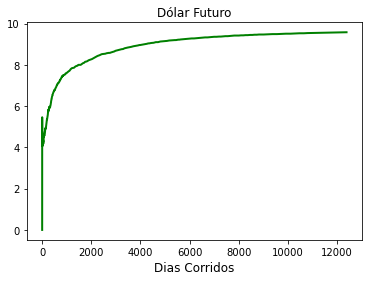

In [9]:
plt.plot(df["Dias Corridos"], df["Ano Corrente"], label = "Dólar Futuro", color = "green", linewidth = 2) 
plt.xlabel("Dias Corridos", fontsize = 12)
plt.title("Dólar Futuro")
plt.show()

### Baixando arquivos da web clicando em botão de "Download"

In [10]:
from selenium import webdriver
import pandas as pd
from time import sleep

In [9]:
driver = webdriver.Chrome("./chromedriver.exe")

driver.get("https://sistemaswebb3-listados.b3.com.br/investorProfilePage/range?language=pt-br")

sleep(3)

driver.find_element_by_link_text('Download').click() # Clicar em download

sleep(3)

driver.quit()

In [17]:
df = pd.read_csv("D:\\Downloads\\Perfil Investidores Faixa Etária_Jun2021.csv", sep = "|", encoding = "latin1", skiprows = 2)

df

,Perfil PF por Faixa Etária,HOMENS,MULHERES,TOTAL,HOMENS.1,MULHERES.1,TOTAL.1,%
0,Até 15 anos,10641,8478,19119,0.37,0.32,0.69,0.13
1,De 16 a 25 anos,333054,107305,440359,4.01,1.46,5.47,1.01
2,De 26 a 35 anos,881955,336061,1218016,34.71,9.67,44.38,8.24
3,De 36 a 45 anos,776812,274682,1051494,77.42,17.36,94.77,17.59
4,De 46 a 55 anos,347014,138706,485720,83.49,20.42,103.91,19.28
5,De 56 a 65 anos,225136,107931,333067,90.06,27.49,117.55,21.81
6,Maior de 66 anos,165947,77554,243501,134.41,37.69,172.09,31.94
7,TOTAL,2740559,1050717,3791276,424.47,114.41,538.86,NaN
